## Test cartesian spatial interpolators using Franke bivariate test function  
http://www.sfu.ca/~ssurjano/franke2d.html  

In [1]:
import numpy as np
import scipy.interpolate
import spatial_interpolators as spi
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### Franke's bivariate test function

In [2]:
def franke(x,y):
	F1 = 0.75*np.exp(-((9.0*x-2.0)**2 + (9.0*y-2.0)**2)/4.0)
	F2 = 0.75*np.exp(-((9.0*x+1.0)**2/49.0-(9.0*y+1.0)/10.0))
	F3 = 0.5*np.exp(-((9.0*x-7.0)**2 + (9.0*y-3.0)**2)/4.0)
	F4 = 0.2*np.exp(-((9.0*x-4.0)**2 + (9.0*y-7.0)**2))
	F = F1 + F2 + F3 - F4
	return F

### Calculate Franke's evaluation function

In [3]:
#-- calculate Franke's evaluation function at random points
X = np.random.rand(500)
Y = np.random.rand(500)
Z = franke(X, Y)
#-- calculate output points
nx = 250
ny = 250
xpts = np.arange(nx)/np.float(nx)
ypts = np.arange(ny)/np.float(ny)
XI,YI = np.meshgrid(xpts,ypts)
#-- calculate real values at grid points
ZI = franke(XI,YI)

### Interpolate to grid

In [4]:
#-- interpolate with radial basis functions
radial = spi.radial_basis(X, Y, Z, XI, YI, polynomial=0,
	smooth=0.001, epsilon=10.0, method='inverse')
wendland = spi.compact_radial_basis(X, Y, Z, XI, YI,
	3, 3, radius=0.45, smooth=0.01)

#-- interpolate with biharmonic spline functions
spline = {}
# spline['0'] = spi.biharmonic_spline(X, Y, Z, XI, YI, TENSION=0)
spline['10'] = spi.biharmonic_spline(X, Y, Z, XI, YI, TENSION=0.1)
# spline['50'] = spi.biharmonic_spline(X, Y, Z, XI, YI, TENSION=0.5)
# spline['90'] = spi.biharmonic_spline(X, Y, Z, XI, YI, TENSION=0.9)
# spline['R10'] = spi.biharmonic_spline(X, Y, Z, XI, YI,
# 	TENSION=0.1, REGULAR=True)
spline['R50'] = spi.biharmonic_spline(X, Y, Z, XI, YI,
	TENSION=0.5, REGULAR=True)

#-- interpolate with Shepard Interpolant function
shepard = {}
# shepard['0'] = spi.shepard_interpolant(X, Y, Z, XI, YI, POWER=0.,
# 	MODIFIED=True, D=0.1, L=0.5)
# shepard['1'] = spi.shepard_interpolant(X, Y, Z, XI, YI, POWER=1.,
# 	MODIFIED=True, D=0.1, L=0.5)
shepard['2'] = spi.shepard_interpolant(X, Y, Z, XI, YI, POWER=2.,
	MODIFIED=True, D=0.1, L=0.5)
# shepard['3'] = spi.shepard_interpolant(X, Y, Z, XI, YI, POWER=3.,
# 	MODIFIED=True, D=0.1, L=0.5)
# shepard['5'] = spi.shepard_interpolant(X, Y, Z, XI, YI, POWER=5.,
# 	MODIFIED=True, D=0.1, L=0.5)
# shepard['10'] = spi.shepard_interpolant(X, Y, Z, XI, YI, POWER=10.,
# 	MODIFIED=True, D=0.1, L=0.5)
# shepard['16'] = spi.shepard_interpolant(X, Y, Z, XI, YI, POWER=16.,
# 	MODIFIED=True, D=0.1, L=0.5)

#-- Interpolating with barnes objective with different lengths scales
barnes = {}
# barnes['5'] = spi.barnes_objective(X, Y, Z, XI, YI, 0.05, 0.05)
barnes['10'] = spi.barnes_objective(X, Y, Z, XI, YI, .10, 0.10)

#-- Interpolating with griddata (linear, nearest, cubic)
#-- interpolation points
interp_points = list(zip(XI.flatten(), YI.flatten()))
# linear_output = scipy.interpolate.griddata(list(zip(X, Y)), Z,
# 	interp_points, method='linear')
cubic_output = scipy.interpolate.griddata(list(zip(X, Y)), Z,
	interp_points, method='cubic')
#-- interpolated data grid
# linear = linear_output.reshape(ny,nx)
cubic = cubic_output.reshape(ny,nx)

### Create output plot showing interpolation and points

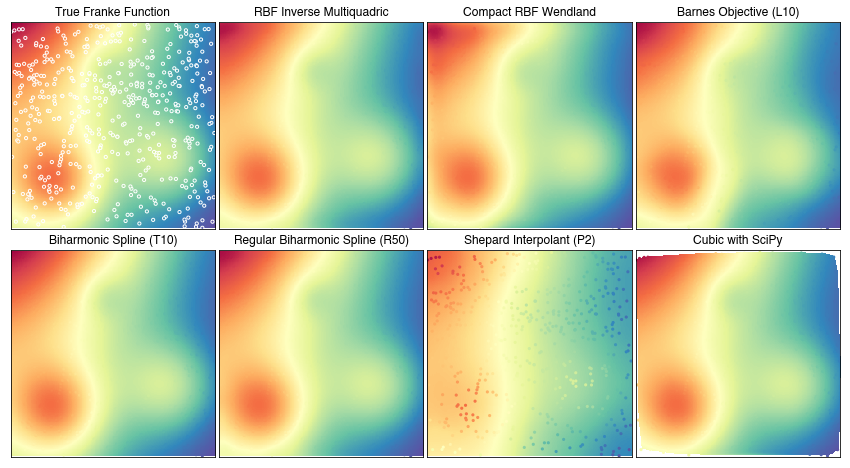

In [5]:
#-- plot data and interpolated data
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(num=1,
	ncols=4, nrows=2, sharex=True, sharey=True, figsize=(12,6.5))
extents=(0,1,1,0)

#-- load color map with invalid points
cmap = cm.Spectral_r
cmap.set_bad('w',0.)

#-- plot real data
ax1.imshow(ZI, interpolation='nearest', extent=extents, cmap=cmap,
	vmin=ZI.min(), vmax=ZI.max())
ax1.scatter(X,Y,c=Z, s=10, cmap=cmap, zorder=2,
	vmin=ZI.min(), vmax=ZI.max(), edgecolors='w')

#-- plot radial basis interpolated data
ax2.imshow(radial, interpolation='nearest', extent=extents, cmap=cmap,
	vmin=ZI.min(), vmax=ZI.max())
#-- plot real data
ax2.scatter(X,Y,c=Z, s=10, cmap=cmap, zorder=2,
	vmin=ZI.min(), vmax=ZI.max(), edgecolors='none')

#-- plot compact radial basis interpolated data
ax3.imshow(wendland, interpolation='nearest', extent=extents, cmap=cmap,
	vmin=ZI.min(), vmax=ZI.max())
#-- plot real data
ax3.scatter(X,Y,c=Z, s=10, cmap=cmap, zorder=2,
	vmin=ZI.min(), vmax=ZI.max(), edgecolors='none')

#-- plot Barnes objective interpolant data
SMOOTH = '10'
ax4.imshow(barnes[SMOOTH], interpolation='nearest', extent=extents,
	cmap=cmap, vmin=ZI.min(), vmax=ZI.max())
#-- plot real data
ax4.scatter(X,Y,c=Z, s=10, cmap=cmap, zorder=2,
	vmin=ZI.min(), vmax=ZI.max(), edgecolors='none')

#-- plot biharmonic spline interpolated data
TENSION = '10'
ax5.imshow(spline[TENSION], interpolation='nearest', extent=extents,
	cmap=cmap, vmin=ZI.min(), vmax=ZI.max())
#-- plot real data
ax5.scatter(X,Y,c=Z, s=10, cmap=cmap, zorder=2,
	vmin=ZI.min(), vmax=ZI.max(), edgecolors='none')

#-- plot regularized biharmonic spline interpolated data
RTENSION = 'R50'
ax6.imshow(spline[RTENSION], interpolation='nearest', extent=extents,
	cmap=cmap, vmin=ZI.min(), vmax=ZI.max())
#-- plot real data
ax6.scatter(X,Y,c=Z, s=10, cmap=cmap, zorder=2,
	vmin=ZI.min(), vmax=ZI.max(), edgecolors='none')

#-- plot Shepard interpolant data
POWER = '2'
ax7.imshow(shepard[POWER], interpolation='nearest', extent=extents,
	cmap=cmap, vmin=ZI.min(), vmax=ZI.max())
#-- plot real data
ax7.scatter(X,Y,c=Z, s=10, cmap=cmap, zorder=2,
	vmin=ZI.min(), vmax=ZI.max(), edgecolors='none')

#-- plot interpolated data from griddata
ax8.imshow(cubic, interpolation='nearest', extent=extents, cmap=cmap,
	vmin=ZI.min(), vmax=ZI.max())
#-- plot real data
ax8.scatter(X,Y,c=Z, s=10, cmap=cmap, zorder=2,
	vmin=ZI.min(), vmax=ZI.max(), edgecolors='none')

#-- no ticks on the x and y axes
ax1.get_xaxis().set_ticks([]); ax1.get_yaxis().set_ticks([])
ax2.get_xaxis().set_ticks([]); ax2.get_yaxis().set_ticks([])
ax3.get_xaxis().set_ticks([]); ax3.get_yaxis().set_ticks([])
ax4.get_xaxis().set_ticks([]); ax4.get_yaxis().set_ticks([])
ax5.get_xaxis().set_ticks([]); ax5.get_yaxis().set_ticks([])
ax6.get_xaxis().set_ticks([]); ax6.get_yaxis().set_ticks([])
ax7.get_xaxis().set_ticks([]); ax7.get_yaxis().set_ticks([])
ax8.get_xaxis().set_ticks([]); ax8.get_yaxis().set_ticks([])
#-- set x and y limits
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
#-- add titles
ax1.set_title('True Franke Function')
ax2.set_title('RBF Inverse Multiquadric')
ax3.set_title('Compact RBF Wendland')
ax4.set_title('Barnes Objective (L{0})'.format(SMOOTH))
ax5.set_title('Biharmonic Spline (T{0})'.format(TENSION))
ax6.set_title('Regular Biharmonic Spline ({0})'.format(RTENSION))
ax7.set_title('Shepard Interpolant (P{0})'.format(POWER))
ax8.set_title('{0} with SciPy'.format('Cubic'))
#-- subplot adjustments
fig.subplots_adjust(left=0.02,right=0.98,bottom=0.02,top=0.95,
	wspace=0.02,hspace=0.1)
plt.show()